## Neuroprosthetics Exercise 1

### Subtask 1 - Generate a Signal


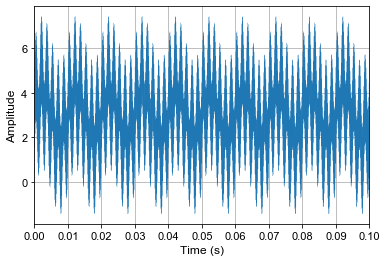

In [4]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['font.family'] = "Arial"
rcParams['xtick.labelsize'] = 11
rcParams['ytick.labelsize'] = 11
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 12
rcParams['axes.grid'] = True

def create_signal(frequencies, amplitudes, duration, sampling_rate, offset=0):
    
    num_frequencies = len(frequencies)
    if num_frequencies != len(amplitudes):
        raise TypeError("Length of amplitude and frequency array must be equal.")
    
    values = []
    num_points = sampling_rate * duration
    time = np.linspace(start=0, stop=duration, num=num_points)
    
    for t in time:
        value = offset
        for i in range (0, num_frequencies):
            value += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t)
        values.append(value)
    
    return values, time

# test data 
frequencies = [100, 600, 9000]
amplitudes = [1, 1.5, 2]
offset = 3
sampling_rate_1 = 100000
duration = 1

# create signal
values_1, time = create_signal(frequencies, amplitudes, duration, sampling_rate_1, offset)

# plot first 100ms
fig = plt.figure()
plt.plot(time, values_1, linewidth=0.2)
plt.xlim(0, 0.1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xticks(np.arange(0, 0.11, 0.01))
plt.show()
fig.savefig('signal.pdf')

### Substask 2 - Calculate the Spectrum

In [2]:
def calculate_spectrum(values):
    """Calculates single sided amplitude spectrum of a signal using FFT."""
    
    # double sided spectrum
    samples = len(values)
    ds_spectrum = np.abs(np.fft.fft(values) / samples)
    
    # single sided spectrum
    half_index = int(samples / 2) + 1
    ss_spectrum = ds_spectrum[:half_index]
    ss_spectrum[1:-1] = 2 * ss_spectrum[1:-1]
    
    return ss_spectrum

# create more signals
sampling_rate_2 = 20000
sampling_rate_3 = 10000
values_2,_ = create_signal(frequencies, amplitudes, duration, sampling_rate_2, offset)
values_3,_ = create_signal(frequencies, amplitudes, duration, sampling_rate_3, offset)

# calculate spectra (omit last value)
spectrum_1 = calculate_spectrum(values_1[:-1])
spectrum_2 = calculate_spectrum(values_2[:-1])
spectrum_3 = calculate_spectrum(values_3[:-1])

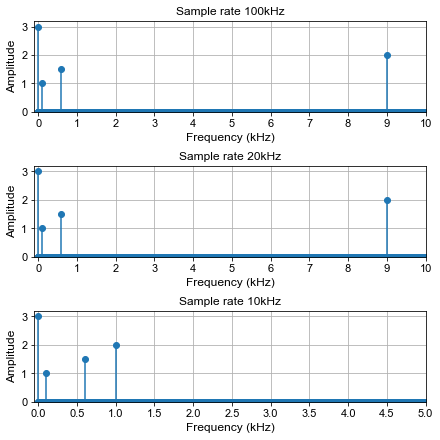

In [3]:
frequencies_scaled_1 = np.arange(0, len(spectrum_1)/1000, 0.001)
frequencies_scaled_2 = np.arange(0, len(spectrum_2)/1000, 0.001)
frequencies_scaled_3 = np.arange(0, len(spectrum_3)/1000, 0.001)

fig, axs = plt.subplots(3, figsize=(6,6), constrained_layout=True)

# subplot spectrum 100kHz
axs[0].stem(frequencies_scaled_1, spectrum_1, use_line_collection=True, basefmt="")
axs[0].set_title("Sample rate 100kHz")
axs[0].set_xlim(-0.1, 10)
axs[0].set_xticks(np.arange(0, 11))

# subplot spectrum 20kHz
axs[1].stem(frequencies_scaled_2, spectrum_2, use_line_collection=True, basefmt="")
axs[1].set_title("Sample rate 20kHz")
axs[1].set_xlim(-0.1, 10)
axs[1].set_xticks(np.arange(0, 11))

# subplot spectrum 10kHz
axs[2].stem(frequencies_scaled_3, spectrum_3, use_line_collection=True, basefmt="")
axs[2].set_title("Sample rate 10kHz")
axs[2].set_xlim(-0.05, 5)
axs[2].set_xticks(np.arange(0, 5.5, 0.5))

for ax in axs.flat:
    ax.set(xlabel="Frequency (kHz)", ylabel="Amplitude")
    ax.set_ylim(0, 3.2)
    ax.set_axisbelow(True)
    ax.set_yticks(np.arange(0, 4, 1))
    
plt.show()
fig.savefig("spectra.pdf")